Dataset: https://www.kaggle.com/datasets/notshrirang/spotify-million-song-dataset/data

In [ ]:
!pip install kaggle -q

Importing Dependencies

In [ ]:
import os
import json
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

Data Collection

In [ ]:
kaggle_config = json.load(open("kaggle.json"))

In [ ]:
kaggle_config.keys()

dict_keys(['username', 'key'])

In [ ]:
# Setting up the environment variables
os.environ["KAGGLE_USERNAME"] = kaggle_config["username"]
os.environ["KAGGLE_KEY"] = kaggle_config["key"]

In [ ]:
# Loading dataset using kaggle api
!kaggle datasets download notshrirang/spotify-million-song-dataset

Dataset URL: https://www.kaggle.com/datasets/notshrirang/spotify-million-song-dataset
License(s): CC0-1.0
  0% 0.00/20.7M [00:00<?, ?B/s]
100% 20.7M/20.7M [00:00<00:00, 1.08GB/s]


In [ ]:
!ls

kaggle.json  sample_data  spotify-million-song-dataset.zip


In [ ]:
with zipfile.ZipFile("spotify-million-song-dataset.zip", "r") as zip_ref:
    zip_ref.extractall()

In [ ]:
# Loading the dataset to a pandas dataframe
df = pd.read_csv("/content/spotify_millsongdata.csv")

Initial Understanding

In [ ]:
df.shape

(57650, 4)

In [ ]:
df.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [ ]:
df.isnull().sum()

,0
artist,0
song,0
link,0
text,0


In [ ]:
# Top artists and songs
top_artists = df["artist"].value_counts().head(10)
print("\nTop 10 Artists")
print(top_artists)


Top 10 Artists
artist
Donna Summer        191
Gordon Lightfoot    189
Bob Dylan           188
George Strait       188
Loretta Lynn        187
Alabama             187
Cher                187
Reba Mcentire       187
Chaka Khan          186
Dean Martin         186
Name: count, dtype: int64


In [ ]:
df = df.sample(10000)

df = df.drop("link", axis = 1).reset_index(drop = True)

In [ ]:
df.shape

(10000, 3)

In [ ]:
df.head()

,artist,song,text
0,Paul McCartney,Flaming Pie,Making love underneath the bed \r\nShooting s...
1,Weird Al Yankovic,One More Minute,Ah \r\n \r\nWell I heard that you're leavin'...
2,Michael Buble,One Step At A Time,One step at a time \r\nThat's how it's gotta ...
3,Tim McGraw,Ain't That Just Like A Dream,I popped the clutch on that old red ford \r\n...
4,Loretta Lynn,I'd Rather Be Sorry,If you hurt me you won't be the first or the l...


In [ ]:
# WordCloud for song lyrics
all_lyrics = " ".join(df["text"].dropna())
wordcloud = WordCloud(width = 800, height = 400, background_color = "white").generate(all_lyrics)

WordCloud to visualize the most common words in the lyrics

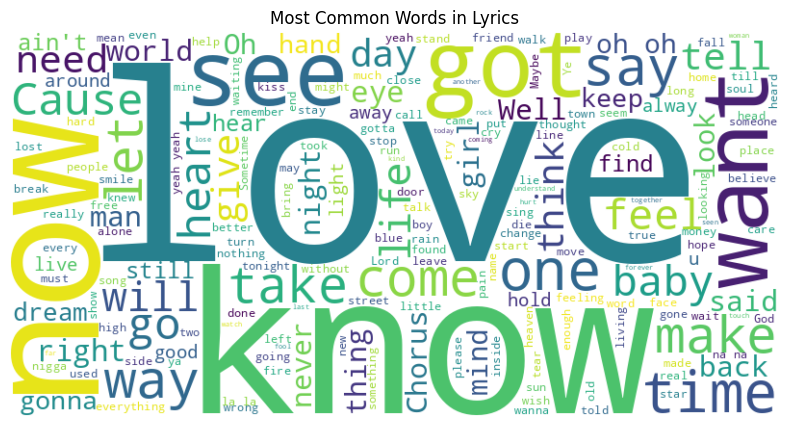

In [ ]:
plt.figure(figsize = (10, 5))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.title("Most Common Words in Lyrics")
plt.show()

Data Preprocessing

In [ ]:
# Download nltk data
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words("english"))

In [ ]:
def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize and remove stopwords
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

In [ ]:
# Apply preprocessing to lyrics
df['cleaned_text'] = df['text'].apply(preprocess_text)

In [ ]:
df.head()

,artist,song,text,cleaned_text
0,Paul McCartney,Flaming Pie,Making love underneath the bed \r\nShooting s...,making love underneath bed shooting stars purp...
1,Weird Al Yankovic,One More Minute,Ah \r\n \r\nWell I heard that you're leavin'...,ah well heard youre leavin leavin gon na leave...
2,Michael Buble,One Step At A Time,One step at a time \r\nThat's how it's gotta ...,one step time thats got ta reason rhyme packin...
3,Tim McGraw,Ain't That Just Like A Dream,I popped the clutch on that old red ford \r\n...,popped clutch old red ford daddy would holler ...
4,Loretta Lynn,I'd Rather Be Sorry,If you hurt me you won't be the first or the l...,hurt wont first last lifetime many mistakes wo...


In [ ]:
# Vectorization with TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features = 5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_text'])

In [ ]:
# Compute Cosine Similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [ ]:
# Recommendation Function
def recommend_songs(song_name, cosine_sim = cosine_sim, df = df, top_n = 5):
    # Find index of the song
    idx = df[df['song'].str.lower() == song_name.lower()].index
    if len(idx) == 0:
        return("Song not found in the dataset!")
    idx = idx[0]

    # Get similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key = lambda x : x[1], reverse = True)
    sim_scores = sim_scores[1 : top_n + 1]

    # Get song indices
    song_indices = [i[0] for i in sim_scores]

    # Return top n similar songs
    return df[['artist', 'song']].iloc[song_indices]

In [ ]:
df['song'][2]

'One Step At A Time'

In [ ]:
# Example Recommendation
print("\nTop Recommendations for the song 'One Step At A Time' : ")
recommendations = recommend_songs("One Step At A Time")  # df['song'][2]
print(recommendations)


Top Recommendations for the song 'One Step At A Time' : 
               artist                                 song
7226        New Order                          Singularity
486   Doobie Brothers                          Without You
1874   Kelly Clarkson                              I Can't
9355       Paul Simon  Me And Julio Down By The Schoolyard
5468        New Order                   This Time Of Night
